***Red Wine Analysis***

---



---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

In [ ]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df=pd.read_csv(url,sep=';')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#descriptive statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Description of Qualities**

---


1.Alcohol:the amount of alcohol in wine   
2.Volatile acidity:acetic acid content which leading to an unpleasant vinegar taste
3.Sulphates:a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant  
4.Citric Acid:acts as a preservative to increase acidity for freshness and flavor to wines  
5.Total Sulfur Dioxide is the amount of SO2  
6.Density:sweeter wines have a higher density  
7.Chlorides:the amount of salt  
8.Fixed acidity:are non-volatile acids that do not evaporate easily  
9.pH:the level of acidity  
10.Free Sulfur Dioxide:it prevents microbial growth and the oxidation of wine
11.Residual sugar:is the amount remaining after fermentation stops


**Importing libraries for graphical and visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

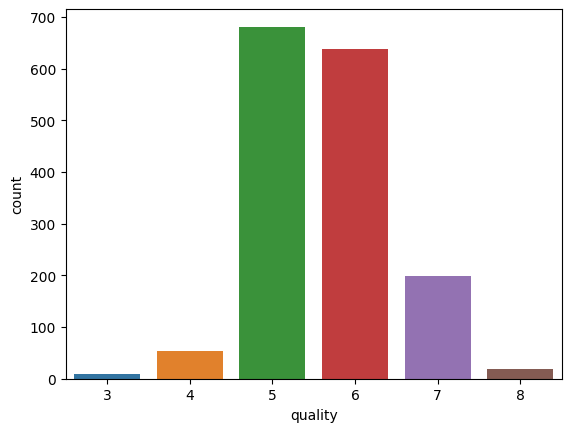

In [ ]:
sns.countplot(x='quality',data=df)
plt.show()


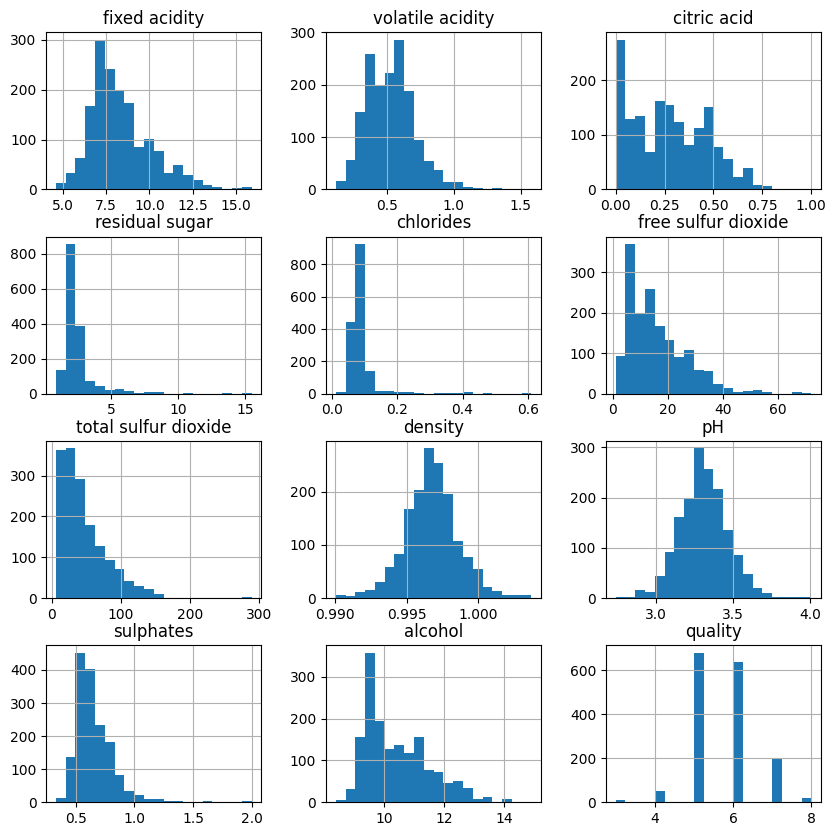

In [ ]:
# histogram to visualise the distribution of the data with continuous values in the columns of the dataset.
df.hist(bins=20, figsize=(10, 10))
plt.show()

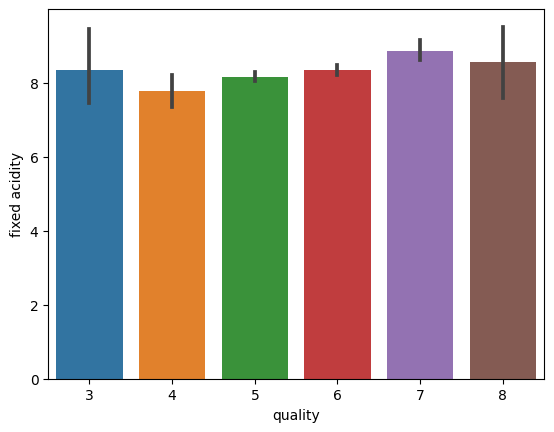

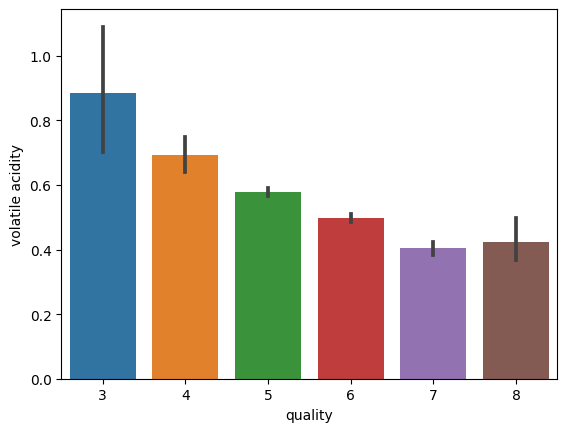

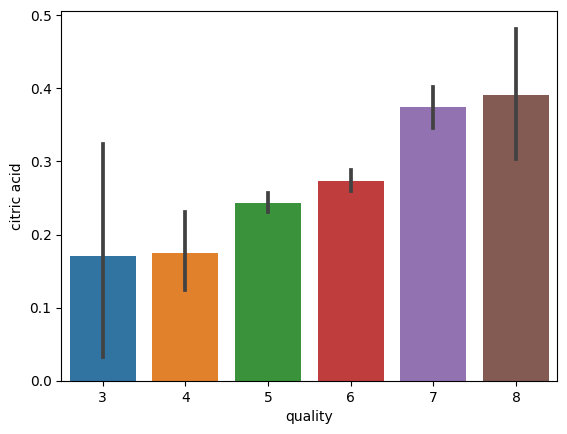

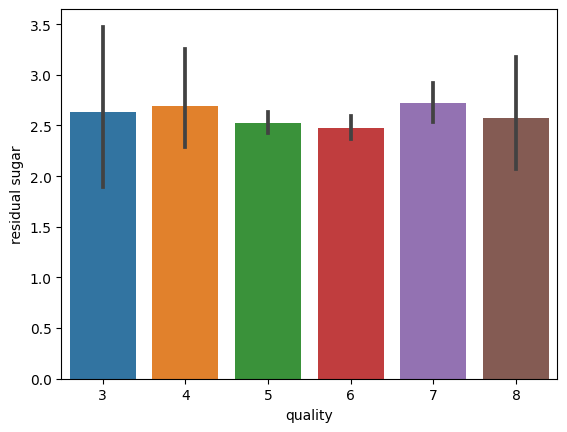

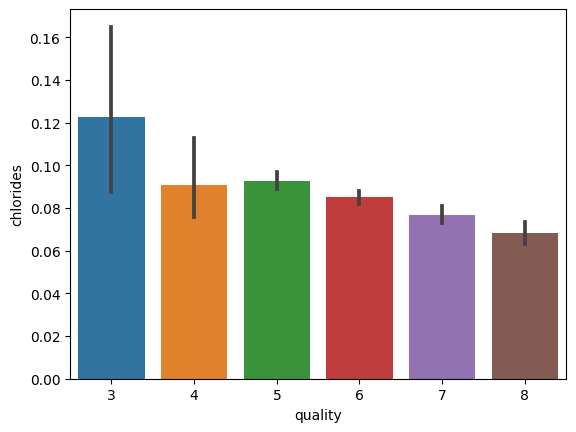

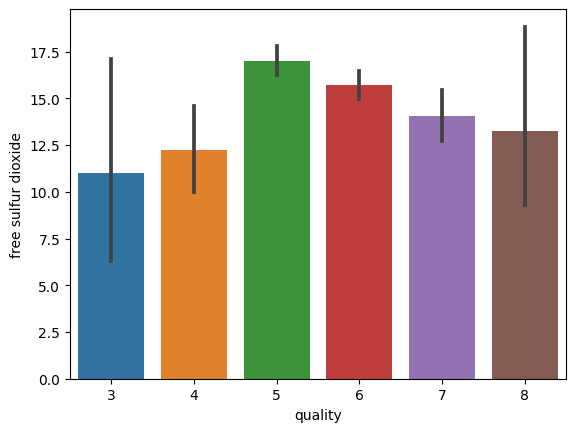

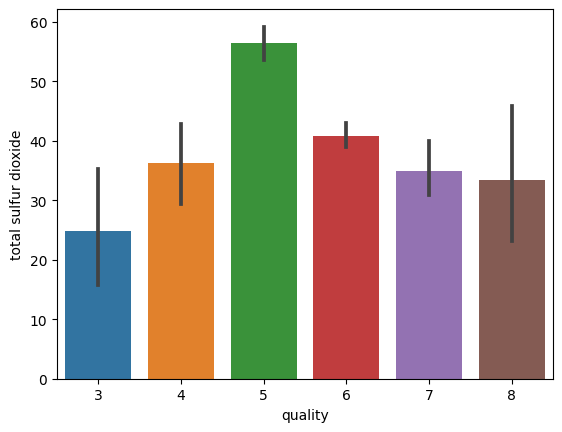

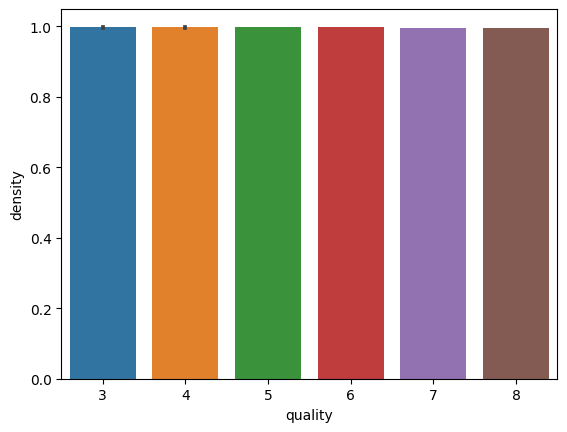

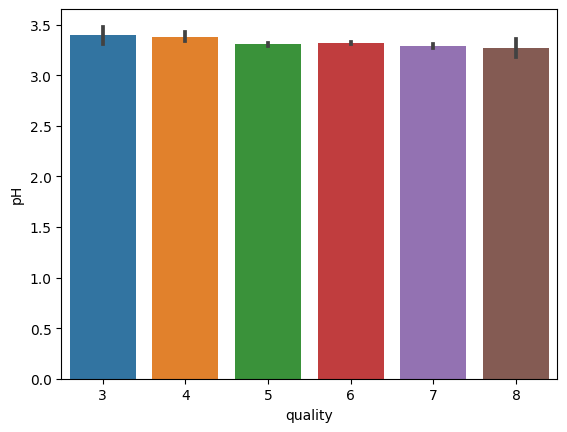

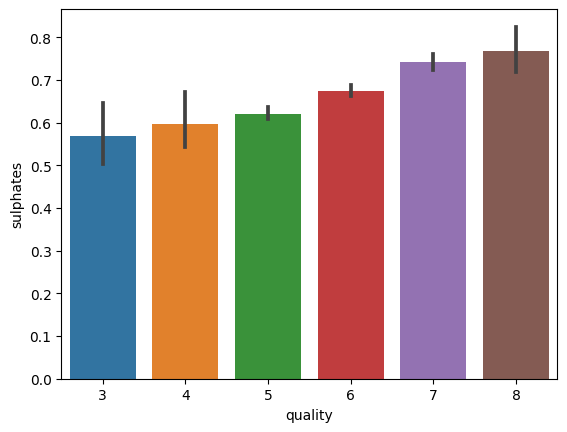

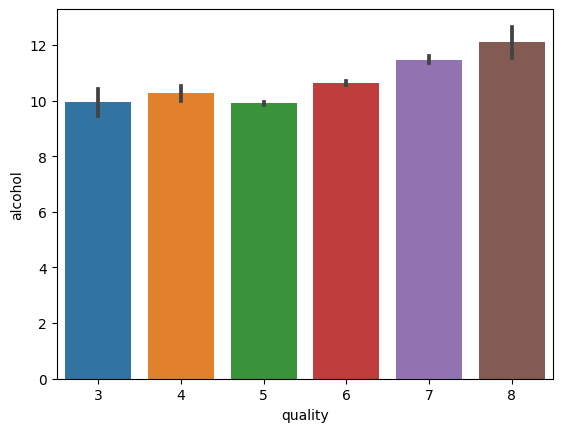

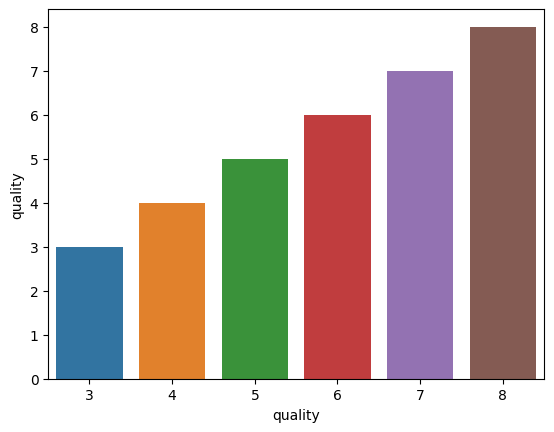

In [ ]:
#df1=df.select_dtypes([np.int(), np.float()])
for i,col in enumerate(df.columns):
    plt.figure(i)
    sns.barplot(x='quality',y=col,data=df)

From the above visualisation we derieve that:

Features fixed acidity and residual sugar might not give any specification to classify/predict the quality.  
Quality increases with  
decrease in volatile acidity.  
increase in citric acid.  
decrease in chlorides.   
decrease in pH.  
increase in sulphates.  
increase in alcohol.  
Free sulfur dioxide alone will not be able to predict the quality.   
Total sulfur dioxide alone will not be able to predict the quality.

<Axes: >

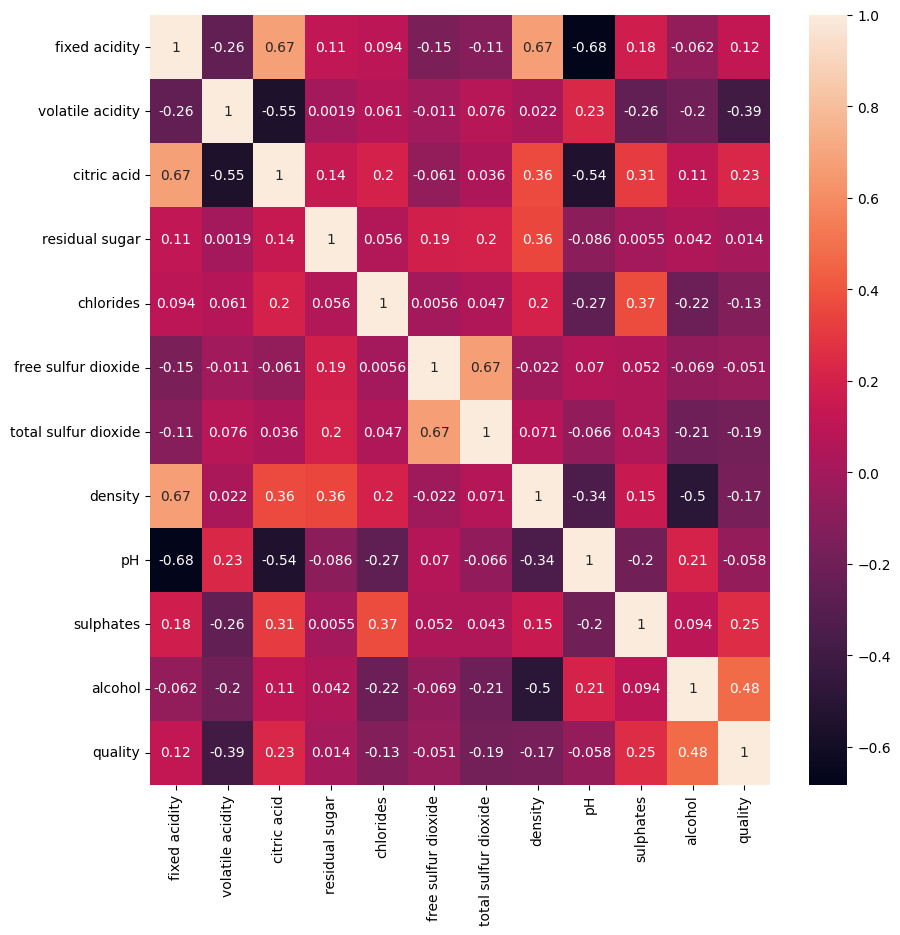

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),color='k',annot=True)

**Checking for outliers in our dataset**

IndexError: ignored

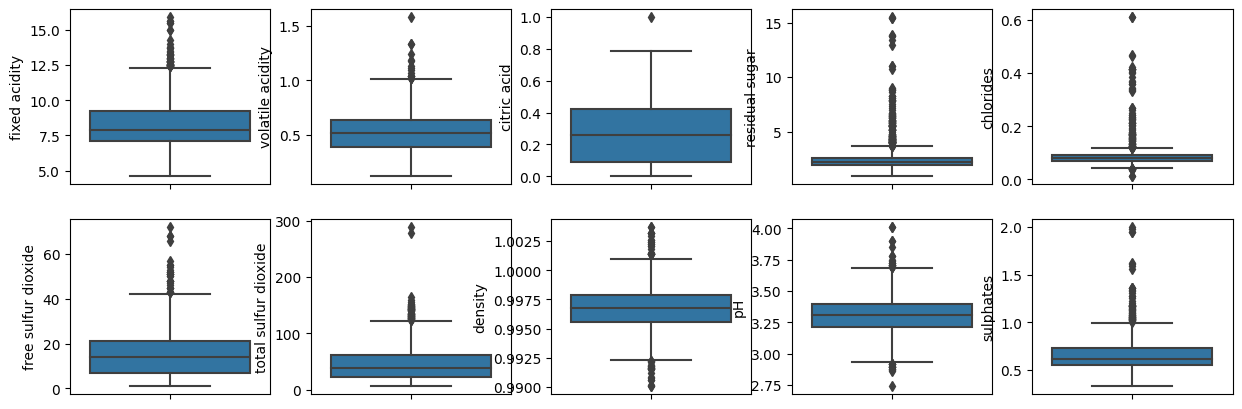

In [ ]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index = 0
for i in df.columns:
  if i != 'quality':
    sns.boxplot(y=i, data=df, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.4)
plt.show()

From the above box plots we can clearly see that there are outliers in all features but Here I am choosing not remove/modify outliers as we are looking for accuracy to minute levels, not just some approximation — high quality wine may have very rare composition (hence outlier) from other average quality wines, so we can not remove or modify outlier values in out dataset.

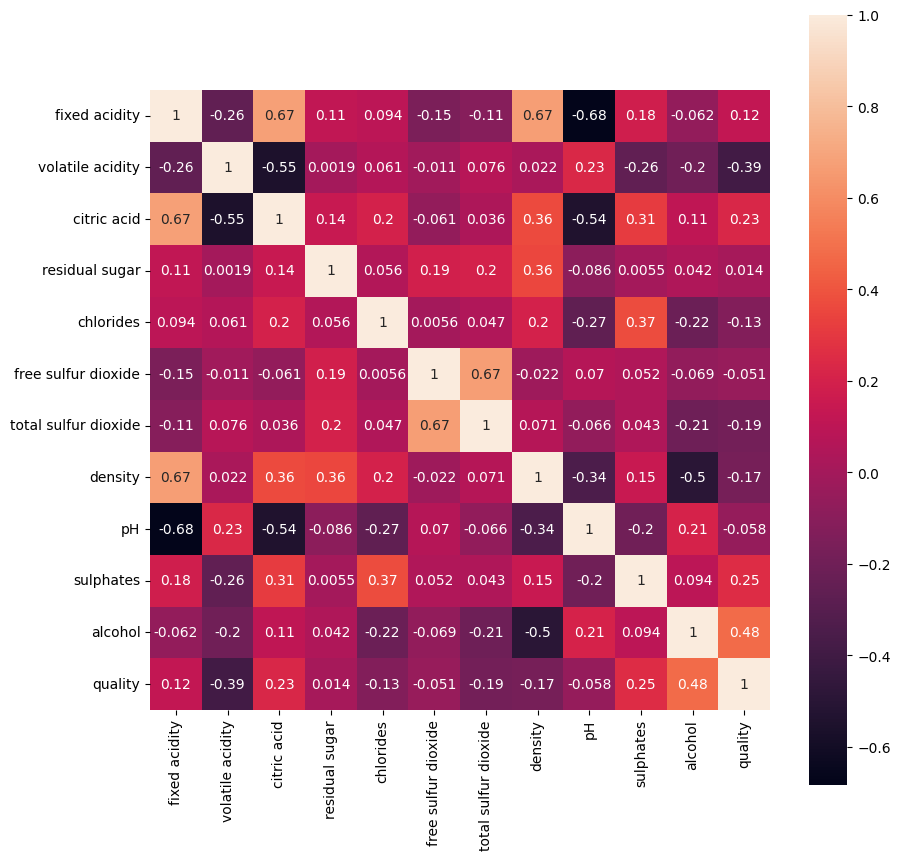

Correlation of different features of our dataset with quality:
fixed acidity : 0.1241
volatile acidity : -0.3906
citric acid : 0.2264
residual sugar : 0.0137
chlorides : -0.1289
free sulfur dioxide : -0.0507
total sulfur dioxide : -0.1851
density : -0.1749
pH : -0.0577
sulphates : 0.2514
alcohol : 0.4762
quality : 1.0000


In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(method='pearson'), annot=True, square=True)
plt.show()

print('Correlation of different features of our dataset with quality:')
for i in df.columns:
  corr, _ = pearsonr(df[i], df['quality'])
  print('%s : %.4f' %(i,corr))

From the above plots and values we can conclude:

volatile acidity, chlorides and ph are negatively correlated to quality -- hence our statement was right that quality increases with decrease in value of these features; and vice versa for other features.
free sulfur dioxide and total sulfur dioxide are highly correlated to each other with correlation of 0.67.
There are many features with correlation < 0.5 to quality, and may be removed from the dataset.
BUT for the same reason as mentioned above in outlier section, that -- we are looking for accuracy to minute levels, not just some approximation — high quality wine may have very rare composition from other average quality wines, hence we need to take every feature in account while predicting quality of wine, so we can not remove or modify outlier values in out dataset.

**Creating Classification bins**

In [ ]:
bins=(2,6.5,8)
group_names=['bad','good']
df['quality']=pd.cut(df['quality'],bins=bins,labels=group_names)

In [ ]:
#importing sklearn packages for machine learning
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

***Classification into ones and zeros using LabelEncoder()***

In [ ]:
# Assigning a label to our quality variable
label_quality = LabelEncoder()
df['quality'] = label_quality.fit_transform(df['quality'])

In [ ]:
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


***Setting the dependent and independent Variables***

In [ ]:
Y = df.quality
X = df.drop('quality', axis=1)

*spliting the data into training and testing data*

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

***Building Machine Learning Models to compare***

In [ ]:
def models(X_train,Y_train):

  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

***Evaluating Performance on Training Sets***

In [ ]:
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.8733385457388585
[1]K Nearest Neighbor Training Accuracy: 0.8983580922595777
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.8537920250195465
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.893666927286943
[4]Gaussian Naive Bayes Training Accuracy: 0.8358092259577795
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9906176700547302


***Evaluating Performance on Testing data sets with Confusion Matrices***

In [ ]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
   cm = confusion_matrix(Y_test, model[i].predict(X_test))
   #extracting TN, FP, FN, TP
   TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
   print(cm)
   print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
   print()# Print a new line

[[277  13]
 [ 18  12]]
Model[0] Testing Accuracy = "0.903125 !"

[[276  14]
 [ 13  17]]
Model[1] Testing Accuracy = "0.915625 !"

[[290   0]
 [ 30   0]]
Model[2] Testing Accuracy = "0.90625 !"

[[285   5]
 [ 21   9]]
Model[3] Testing Accuracy = "0.91875 !"

[[240  50]
 [  6  24]]
Model[4] Testing Accuracy = "0.825 !"

[[270  20]
 [ 10  20]]
Model[5] Testing Accuracy = "0.90625 !"

[[278  12]
 [ 12  18]]
Model[6] Testing Accuracy = "0.925 !"



Random Forrest Classification model gave the best accuracy and can be considered as a good model for predictiong the quality of wine for this problem.

Logisgic Regression, KNN and SVC also have comparable score to Random Forrest and may also be used to predict quality of wine.
Naive Bayes model gave the least accuracy, which can be considered bad model to predict the quality of fine.